In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
#loading data fron csv files
Data = pd.read_csv("energy_dataset.csv") 
Data2 = pd.read_csv("weather_features.csv") 

In [3]:
#select the fetures will need
Energy_data=Data.loc[:, ["time","total load actual","total load forecast" ]]

In [4]:
Energy_data.head()

,time,total load actual,total load forecast
0,2015-01-01 00:00:00+01:00,25385.0,26118.0
1,2015-01-01 01:00:00+01:00,24382.0,24934.0
2,2015-01-01 02:00:00+01:00,22734.0,23515.0
3,2015-01-01 03:00:00+01:00,21286.0,22642.0
4,2015-01-01 04:00:00+01:00,20264.0,21785.0


In [5]:
#Energy_data.describe().round(2)
Energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
time                   35064 non-null object
total load actual      35028 non-null float64
total load forecast    35064 non-null float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


## there are null values

In [6]:
Weather_data=Data2.loc[:, ["dt_iso","city_name","temp", "pressure", "humidity", "wind_speed"]]
Weather_data.head()

,dt_iso,city_name,temp,pressure,humidity,wind_speed
0,2015-01-01 00:00:00+01:00,Valencia,270.475,1001,77,1
1,2015-01-01 01:00:00+01:00,Valencia,270.475,1001,77,1
2,2015-01-01 02:00:00+01:00,Valencia,269.686,1002,78,0
3,2015-01-01 03:00:00+01:00,Valencia,269.686,1002,78,0
4,2015-01-01 04:00:00+01:00,Valencia,269.686,1002,78,0


In [7]:
Weather_data.describe().round(2)

,temp,pressure,humidity,wind_speed
count,178396.00,178396.00,178396.00,178396.00
mean,289.62,1069.26,68.42,2.47
std,8.03,5969.63,21.90,2.10
min,262.24,0.00,0.00,0.00
25%,283.67,1013.00,53.00,1.00
50%,289.15,1018.00,72.00,2.00
75%,295.15,1022.00,87.00,4.00
max,315.60,1008371.00,100.00,133.00


## there are outliers 

In [8]:
# Print the type of each variable in df_weather
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 6 columns):
dt_iso        178396 non-null object
city_name     178396 non-null object
temp          178396 non-null float64
pressure      178396 non-null int64
humidity      178396 non-null int64
wind_speed    178396 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.2+ MB


In [9]:
Weather_data['pressure']=Weather_data['pressure'].astype('float64')
Weather_data['humidity']=Weather_data['humidity'].astype('float64')
Weather_data['wind_speed']=Weather_data['wind_speed'].astype('float64')

In [10]:
# Convert dt_iso to datetime type, rename it and set it as index
Weather_data['time'] = pd.to_datetime(Weather_data['dt_iso'],  infer_datetime_format=True)
Weather_data = Weather_data.drop(['dt_iso'], axis=1)
Weather_data = Weather_data.set_index('time')


# check for null values in energy and weather data

In [11]:
#check for null values
print("there number of null values in Εnergy_data is:",format(Energy_data.isnull().values.sum()))

there number of null values in Εnergy_data is: 36


In [12]:
Energy_data.isnull().sum(axis=0)

time                    0
total load actual      36
total load forecast     0
dtype: int64

In [13]:
print("there number of null values in Weather_data is:",format(Weather_data.isnull().values.sum()))

there number of null values in Weather_data is: 0


In [14]:
#check wich data is null
#Energy_data[Energy_data.isnull().any(axis=1)]

In [15]:
#apply linear interpolation with a forward direction to fill the gups
Energy_data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [16]:
Energy_data.head()

,time,total load actual,total load forecast
0,2015-01-01 00:00:00+01:00,25385.0,26118.0
1,2015-01-01 01:00:00+01:00,24382.0,24934.0
2,2015-01-01 02:00:00+01:00,22734.0,23515.0
3,2015-01-01 03:00:00+01:00,21286.0,22642.0
4,2015-01-01 04:00:00+01:00,20264.0,21785.0


In [17]:
#check the number of observations in weather data, to be sure that identify with energy data
print('There are {} observations in Energy_data.'.format(Energy_data.shape[0]))

cities = Weather_data['city_name'].unique()
grouped_weather = Weather_data.groupby('city_name')

for city in cities:
    print('There are {} observations in Weather_data'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in Energy_data.
There are 35145 observations in Weather_data about city: Valencia.
There are 36267 observations in Weather_data about city: Madrid.
There are 35951 observations in Weather_data about city: Bilbao.
There are 35476 observations in Weather_data about city:  Barcelona.
There are 35557 observations in Weather_data about city: Seville.


In [18]:
#check for dublicate values in energy data
temp_energy = Energy_data.duplicated(keep='first').sum()
print(format(temp_energy))

0


In [19]:
#check for dublicate values in weather data for every city seperately
for city in cities:
    print('There are {} dublicates in Weather_data'
          .format(grouped_weather.get_group('{}'.format(city)).duplicated(keep='first').sum()), 
          'about city: {}.'.format(city))
#temp_weather = Weather_data.duplicated(keep='first').sum()

There are 6747 dublicates in Weather_data about city: Valencia.
There are 3901 dublicates in Weather_data about city: Madrid.
There are 3279 dublicates in Weather_data about city: Bilbao.
There are 5677 dublicates in Weather_data about city:  Barcelona.
There are 4510 dublicates in Weather_data about city: Seville.


In [20]:
#drop duplicates from weather data 
Weather_final = Weather_data.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='last')#.set_index('time')

In [21]:
print('There are {} observations in Weather_data.'.format(Energy_data.shape[0]))

cities = Weather_final['city_name'].unique()
grouped_weather = Weather_final.groupby('city_name')

for city in cities:
    print('There are {} observations in Weather_data'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in Weather_data.
There are 35064 observations in Weather_data about city: Valencia.
There are 35064 observations in Weather_data about city: Madrid.
There are 35064 observations in Weather_data about city: Bilbao.
There are 35064 observations in Weather_data about city:  Barcelona.
There are 35064 observations in Weather_data about city: Seville.


# outlier detection 


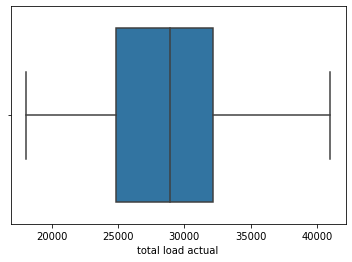

In [22]:
# Check for outliers in load data 
sns.boxplot(x=Energy_data['total load actual'])
plt.show()

temperature


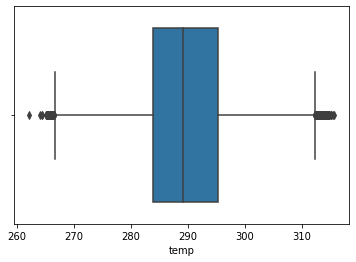

pressure


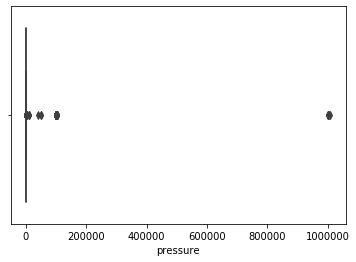

humidity


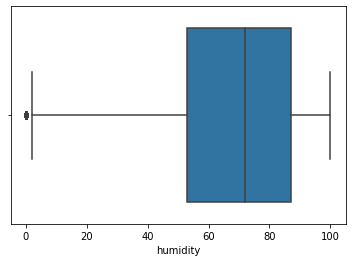

wind speed


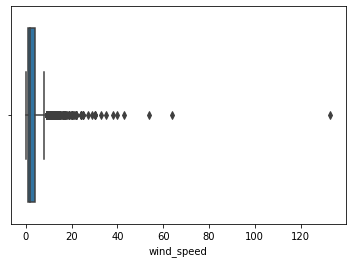

In [23]:
# Check for outliers in weather data 
print('temperature')
sns.boxplot(x=Weather_final['temp'])
plt.show()
print('pressure')
sns.boxplot(x=Weather_final['pressure'])
plt.show()
print('humidity')
sns.boxplot(x=Weather_final['humidity'])
plt.show()
print('wind speed')
sns.boxplot(x=Weather_final['wind_speed'])
plt.show()

## find outliers in humidity, pressure, and wind_speed, set them null value and use interpolation to fill the gaps

In [24]:
# Replace outliers in 'pressure' with NaNs
Weather_final.loc[Weather_final.pressure > 1051, 'pressure'] = np.nan
Weather_final.loc[Weather_final.pressure < 931, 'pressure'] = np.nan
""" 1051 hPa is above the highest air pressure ever recorded in the Iberian peninsula and 931 hPa the lowest air 
pressure ever recorded in the Iberian peninsula. """


' 1051 hPa is above the highest air pressure ever recorded in the Iberian peninsula and 931 hPa the lowest air \npressure ever recorded in the Iberian peninsula. '

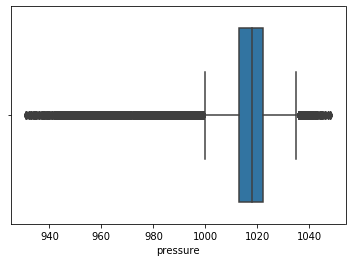

In [25]:
# Check for outliers in 'pressure' column again

sns.boxplot(x=Weather_final['pressure'])
plt.show()

In [26]:
print("there number of null values in Weather_data is:",format(Weather_final.isnull().values.sum()))

there number of null values in Weather_data is: 441


In [27]:
# Replace outliers in 'wind_speed' with NaNs
Weather_final.loc[Weather_final.wind_speed > 50, 'wind_speed'] = np.nan
""" 50 m/s,is the highest bound (112 mph) of the wind speed estimate of a F1 (Fujita scale)
 tornado, having in mind that the last F1 tornado in Spain was Gandia tornado, which was recorded on 28th September
 2012, 2 years before the starting point of our available data. """

' 50 m/s,is the highest bound (112 mph) of the wind speed estimate of a F1 (Fujita scale)\n tornado, having in mind that the last F1 tornado in Spain was Gandia tornado, which was recorded on 28th September\n 2012, 2 years before the starting point of our available data. '

In [28]:
print("there number of null values in Weather_data is:",format(Weather_final.isnull().values.sum()))

there number of null values in Weather_data is: 444


In [29]:
# Replace outliers in 'humidity' with NaNs

Weather_final.loc[Weather_final.humidity < 1, 'humidity'] = np.nan

In [30]:
print("there number of null values in Weather_data is:",format(Weather_final.isnull().values.sum()))

there number of null values in Weather_data is: 507


humidity


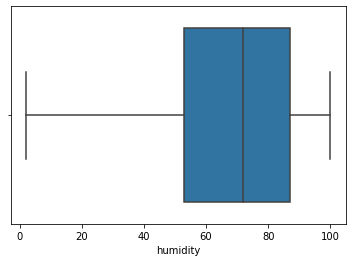

In [31]:
print('humidity')
sns.boxplot(x=Weather_final['humidity'])
plt.show()

In [32]:
#Fill null values using linear interpolation
Weather_final.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [33]:
#split Weather_final data by city
Barcelona,Bilbao, Madrid, Seville, Valencia  = [x for _, x in Weather_final.groupby('city_name')]
df_Cities = [Barcelona, Bilbao, Madrid, Seville, Valencia ]

In [34]:
#Convert time to datetime object and set it as index
Energy_data['time'] = pd.to_datetime(Energy_data['time'], infer_datetime_format=True)
#Energy_data = Energy_data.set_index('time')

In [35]:
# Merge all dataframes into the final dataframe

Final_data = Energy_data

for df in df_Cities:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df['time'] = df['time_' + city_str]
    Final_data = Final_data.merge(df, on=['time'], how='outer')
    Final_data = Final_data.drop('city_name_{}'.format(city_str), axis=1)
    Final_data = Final_data.drop('time_'+city_str, axis=1)
    
Final_data.columns

Index(['time', 'total load actual', 'total load forecast', 'temp_Barcelona',
       'pressure_Barcelona', 'humidity_Barcelona', 'wind_speed_Barcelona',
       'temp_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'temp_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'temp_Seville',
       'pressure_Seville', 'humidity_Seville', 'wind_speed_Seville',
       'temp_Valencia', 'pressure_Valencia', 'humidity_Valencia',
       'wind_speed_Valencia'],
      dtype='object')

In [36]:
Final_data = Final_data.set_index('time')

In [38]:
Final_data.head()

,total load actual,total load forecast,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,...,humidity_Madrid,wind_speed_Madrid,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,25385.0,26118.0,281.625,1035.0,100.0,7.0,269.657312,1036.0,97.0,0.0,...,63.0,1.0,273.375,1039.0,75.0,1.0,270.475,1001.0,77.0,1.0
2015-01-01 01:00:00+01:00,24382.0,24934.0,281.625,1035.0,100.0,7.0,269.763500,1035.0,97.0,0.0,...,63.0,1.0,273.375,1039.0,75.0,1.0,270.475,1001.0,77.0,1.0
2015-01-01 02:00:00+01:00,22734.0,23515.0,281.286,1036.0,100.0,7.0,269.251688,1036.0,97.0,1.0,...,64.0,1.0,274.086,1039.0,71.0,3.0,269.686,1002.0,78.0,0.0
2015-01-01 03:00:00+01:00,21286.0,22642.0,281.286,1036.0,100.0,7.0,269.203344,1035.0,97.0,1.0,...,64.0,1.0,274.086,1039.0,71.0,3.0,269.686,1002.0,78.0,0.0
2015-01-01 04:00:00+01:00,20264.0,21785.0,281.286,1036.0,100.0,7.0,269.485500,1035.0,97.0,1.0,...,64.0,1.0,274.086,1039.0,71.0,3.0,269.686,1002.0,78.0,0.0


In [39]:
print('There are {} missing values or NaNs in Final_data.'
      .format(Final_data.isnull().values.sum()))

temp_final = Final_data.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in Final_data based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in Final_data.

There are 0 duplicate rows in Final_data based on all columns.


In [40]:
#Final_data.info()

In [41]:
#time feature generation
for i in range(len(Final_data)):
    position = Final_data.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    Final_data.loc[position, 'hour'] = hour
    Final_data.loc[position, 'weekday'] = weekday
    Final_data.loc[position, 'month'] = month

In [42]:
Final_data.tail()

,total load actual,total load forecast,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,...,pressure_Seville,humidity_Seville,wind_speed_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,30653.0,30619.0,284.13,1027.0,71.0,1.0,281.26,1033.0,93.0,0.0,...,1028.0,54.0,3.0,285.64,1028.0,62.0,2.0,19.0,0.0,12.0
2018-12-31 20:00:00+01:00,29735.0,29932.0,282.64,1027.0,62.0,3.0,279.81,1034.0,93.0,1.0,...,1029.0,62.0,3.0,283.14,1029.0,71.0,1.0,20.0,0.0,12.0
2018-12-31 21:00:00+01:00,28071.0,27903.0,282.14,1028.0,53.0,4.0,277.15,1034.0,100.0,1.0,...,1028.0,58.0,4.0,281.66,1029.0,81.0,3.0,21.0,0.0,12.0
2018-12-31 22:00:00+01:00,25801.0,25450.0,281.13,1028.0,50.0,5.0,276.60,1034.0,93.0,1.0,...,1029.0,57.0,4.0,280.14,1029.0,81.0,2.0,22.0,0.0,12.0
2018-12-31 23:00:00+01:00,24455.0,24424.0,280.13,1028.0,100.0,5.0,275.60,1034.0,93.0,2.0,...,1029.0,70.0,3.0,279.14,1029.0,75.0,2.0,23.0,0.0,12.0


In [43]:
Final_data.to_csv('Final_data_1.csv') 